In [ ]:
from skimage import data,io
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage.transform import rescale, resize, downscale_local_mean


In [ ]:
img = io.imread('/Users/pulkit/Downloads/Images/n02085620-Chihuahua/n02085620_7.jpg')

In [ ]:
io.imshow(img)
plt.show()

In [ ]:
xmin = 71
ymin = 1
xmax = 192
ymax = 180

im_crop = img[ymin:ymax,xmin:xmax]
np.shape(im_crop)

In [ ]:
io.imshow(im_crop)
plt.show()

image_resized1 = resize(im_crop, (100, 100))
io.imshow(image_resized1)
plt.show()



In [ ]:
img2 = io.imread('/Users/pulkit/Downloads/Images/n02092002-Scottish_deerhound/n02092002_3.jpg')
np.shape(img2)

In [ ]:
io.imshow(img2)
plt.show()

In [ ]:
xmin = 1
ymin = 36
xmax = 482
ymax = 445

im2_crop = img[ymin:ymax,xmin:xmax]

In [ ]:
io.imshow(im2_crop)
plt.show()

In [ ]:
image_resized = resize(im2_crop, (100, 100))

In [ ]:
io.imshow(image_resized)
plt.show()
np.shape(image_resized)

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('/Users/pulkit/Downloads/Annotation/n02085620-Chihuahua/n02085620_7')
root = tree.getroot()
for child in root:
    print(child.tag, child.text)
    
objects = tree.findall('object')
for object_iter in objects:
    bndbox = object_iter.find("bndbox")
    

kk = [(it.tag, it.text) for it in bndbox]




In [ ]:
import pandas as pd
full_metadata = pd.DataFrame(columns=['filename', 'folder' , 'label'])
print(full_metadata)


In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('/Users/pulkit/Downloads/Annotation/n02085620-Chihuahua/n02085620_7')
root = tree.getroot()
for child in root:
    if child.tag == 'filename': full_metadata.loc[1, 'filename'] = child.text

    if child.tag == 'folder': full_metadata.loc[1, 'folder'] = child.text
        
    if child.tag == 'size':
        for object_iter in child: full_metadata.loc[1, object_iter.tag] = object_iter.text
            
    if child.tag == 'object':
        for object_iter in child:
            if object_iter.tag == 'name': full_metadata.loc[1, object_iter.tag] = object_iter.text
            if object_iter.tag == 'bndbox':
                for it in object_iter:
                    full_metadata.loc[1, it.tag] = it.text

print(full_metadata)

In [ ]:
import scipy.io

file_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['file_list']
file_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['labels']
file_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['annotation_list']

test_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['file_list']
test_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['labels']
test_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['annotation_list']

train_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['file_list']
train_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['labels']
train_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['annotation_list']

train_filenames = [x[0][0] for x in train_list]
test_filenames = [x[0][0] for x in test_list]
train_annotation = [x[0][0] for x in train_annotation]

train_labels = [x[0] for x in train_labels]
test_labels = [x[0] for x in test_labels]
test_annotation = [x[0][0] for x in test_annotation]

print(train_labels[:5])
print(train_filenames[:5])
print(train_annotation[:5])


print(test_labels[:5])
print(test_filenames[:5])
print(test_annotation[:5])

In [ ]:
file_list = file_list[0]
print(file_list)

In [ ]:
import os
directory = '/Users/pulkit/Desktop/imagia/data/images'
[x[0] for x in os.walk(directory)]

from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = '/Users/pulkit/Desktop/imagia/data/images'
toDirectory = '/Users/pulkit/Desktop/imagia/full_data'

copy_tree(fromDirectory, toDirectory)

In [ ]:
from os import walk
import shutil
import os
import numpy as np
import scipy.io
import xml.etree.ElementTree as ET

file_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['file_list']
file_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['labels']

test_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['file_list']
test_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['labels']

train_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['file_list']
train_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['labels']


"""
path ='/Users/pulkit/Desktop/imagia/data/images'
for (dirpath, dirnames, filenames) in walk(path):
    for file in filenames:
      path_file = os.path.join(dirpath,file)
      shutil.copy2(path_file,'/Users/pulkit/Desktop/imagia/full_data')
"""
    
""" path ='/Users/pulkit/Desktop/imagia/data/annotation'
for (dirpath, dirnames, filenames) in walk(path):
    for file in filenames:
      path_file = os.path.join(dirpath,file)
      shutil.copy2(path_file,'/Users/pulkit/Desktop/imagia/full_annotation')    """

all_data_filenames = []  
path ='/Users/pulkit/Desktop/imagia/full_data'
for (dirpath, dirnames, filenames) in walk(path):
    all_data_filenames.append(dirnames)
    
all_data_filenames = [x for x in os.listdir('/Users/pulkit/Desktop/imagia/full_data') if not x.startswith('.') ]
all_data_filenames = sorted(all_data_filenames)

all_annotation_filenames = [x for x in os.listdir('/Users/pulkit/Desktop/imagia/full_annotation') if not x.startswith('.')]
all_annotation_filenames = sorted(all_annotation_filenames)

all_data_label = file_labels


print(np.shape(all_data_filenames ))
print(np.shape(all_annotation_filenames))
print(np.shape(all_data_label))


print((all_data_filenames[:5]))
print((all_annotation_filenames[:5]))
print((all_data_label[:5]))

labels = np.zeros((20850,))
print(np.shape(labels))

import pandas as pd
full_metadata = pd.DataFrame(columns=['filename', 'folder' , 'label'])
full_metadata['image_name'] = all_data_filenames
full_metadata['label'] = all_data_label


def parser(full_metadata, full_path, index):
    tree = ET.parse(full_path)
    root = tree.getroot()
    for child in root:
        if child.tag == 'filename': full_metadata.loc[index, 'filename'] = child.text

        if child.tag == 'folder': full_metadata.loc[index, 'folder'] = child.text

        if child.tag == 'size':
            for object_iter in child: full_metadata.loc[index, object_iter.tag] = object_iter.text

        if child.tag == 'object':
            for object_iter in child:
                if object_iter.tag == 'name': full_metadata.loc[index, object_iter.tag] = object_iter.text
                if object_iter.tag == 'bndbox':
                    for it in object_iter:
                        full_metadata.loc[index, it.tag] = it.text
                        
for index, filename in enumerate(all_annotation_filenames):
    if index%100 == 0:
        print index
    full_path = '/Users/pulkit/Desktop/imagia/full_annotation/' + filename
    parser(full_path, index)

#print(full_metadata)
                    
                    
"""
all_the_data = f[1:]
print(len(all_the_data))

all_images_filenames = []

for folder in all_the_data:
    for image in folder:
        all_images_filenames.append(image)
        
print(len(all_images_filenames))
print(all_images_filenames)

"""




In [ ]:
print(full_metadata[:200])

In [ ]:
import pickle
full_metadata.to_pickle('full_metadata.pickle') 

In [ ]:
import pickle

with open(r"full_metadata.pickle", "rb") as input_file:
    e = pickle.load(input_file)
data_resize_numpy_train = np.zeros((len(train_filenames),200,200,3))

for index, row in e.iterrows():
    if index%100 ==0:
        print(index)
    image_path = '/Users/pulkit/Desktop/imagia/full_data/' + row['image_name']
    img = io.imread(image_path)
    if row['image_name'] in train_filenames:
        img_crop = img[int(row['ymin']):int(row['ymax']),int(row['xmin']):int(row['xmax']),:3]
        img_resize = resize(img_crop, (200, 200))
        data_resize_numpy_train[index] = img_resize
        

    


In [ ]:
import pickle

with open(r"full_data.pickle", "rb") as input_file:
    e = pickle.load(input_file)
 


In [ ]:
print(e[:2])

In [ ]:
import scipy.io

file_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['file_list']
file_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['labels']
file_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['annotation_list']

test_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['file_list']
test_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['labels']
test_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['annotation_list']

train_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['file_list']
train_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['labels']
train_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['annotation_list']

train_filenames = [x[0][0] for x in train_list]
test_filenames = [x[0][0] for x in test_list]
train_annotation = [x[0][0] for x in train_annotation]

train_labels = [x[0] for x in train_labels]
test_labels = [x[0] for x in test_labels]
test_annotation = [x[0][0] for x in test_annotation]

print(train_labels[:5])
print(train_filenames[:5])
print(train_annotation[:5])


print(test_labels[:5])
print(test_filenames[:5])
print(test_annotation[:5])

#training data

import pandas as pd
traindata = pd.DataFrame(columns=['filename', 'folder' , 'label'])
train_filename = [x.split('/') for x in train_filenames]
train_filename = [x[1] for x in train_filename]
traindata['image_name'] = train_filename

train_annotation = [x.split('/') for x in train_annotation]
train_annotation = [x[1] for x in train_annotation]
traindata['annotation'] = train_annotation

traindata['label'] = train_labels

print(traindata[:5])

testdata = pd.DataFrame(columns=['filename', 'folder' , 'label'])
test_filename = [x.split('/') for x in test_filenames]
test_filename = [x[1] for x in test_filename]
testdata['image_name'] = test_filename

test_annotation = [x.split('/') for x in test_annotation]
test_annotation = [x[1] for x in test_annotation]
testdata['annotation'] = test_annotation

testdata['label'] = test_labels
print(testdata[:5])

print(len(traindata))
print(len(testdata))

import xml.etree.ElementTree as ET
def parser(full_metadata, full_path, index):
    tree = ET.parse(full_path)
    root = tree.getroot()
    for child in root:
        if child.tag == 'filename': full_metadata.loc[index, 'filename'] = child.text

        if child.tag == 'folder': full_metadata.loc[index, 'folder'] = child.text

        if child.tag == 'size':
            for object_iter in child: full_metadata.loc[index, object_iter.tag] = object_iter.text

        if child.tag == 'object':
            for object_iter in child:
                if object_iter.tag == 'name': full_metadata.loc[index, object_iter.tag] = object_iter.text
                if object_iter.tag == 'bndbox':
                    for it in object_iter:
                        full_metadata.loc[index, it.tag] = it.text


for index, file in traindata.iterrows():
    if index%100 == 0:
        print index
    full_path = '/Users/pulkit/Desktop/imagia/full_annotation/' + file['annotation']
    parser(traindata, full_path, index)

                         

for index, file in testdata.iterrows():
    if index%100 == 0:
        print index
    full_path = '/Users/pulkit/Desktop/imagia/full_annotation/' + file['annotation']
    parser(testdata, full_path, index)


print(traindata[:5])
print(testdata[:5])


In [1]:
import pickle
"""
with open('traindata.pickle', 'wb') as fp:
    pickle.dump(traindata, fp)
    
with open('testdata.pickle', 'wb') as fp:
    pickle.dump(testdata, fp)
"""

    
with open(r"traindata.pickle", "rb") as input_file:
    traindata = pickle.load(input_file)
    
with open(r"testdata.pickle", "rb") as input_file:
    testdata = pickle.load(input_file)
    
print(traindata[:5])
print(testdata[:5])


          filename    folder  label           image_name       annotation  \
0   n02085620_5927  02085620      1   n02085620_5927.jpg   n02085620_5927   
1   n02085620_4441  02085620      1   n02085620_4441.jpg   n02085620_4441   
2   n02085620_1502  02085620      1   n02085620_1502.jpg   n02085620_1502   
3   n02085620_1916  02085620      1   n02085620_1916.jpg   n02085620_1916   
4  n02085620_13151  02085620      1  n02085620_13151.jpg  n02085620_13151   

  width height depth       name xmin ymin xmax ymax  
0   360    300     3  Chihuahua   30   14  236  298  
1   375    500     3  Chihuahua  107  110  296  401  
2   500    333     3  Chihuahua   51   13  418  331  
3   500    495     3  Chihuahua    8    7  456  397  
4   500    336     3  Chihuahua  176   29  379  333  
         filename    folder  label          image_name      annotation width  \
0  n02085620_2650  02085620      1  n02085620_2650.jpg  n02085620_2650   500   
1  n02085620_4919  02085620      1  n02085620_4919.jp

In [2]:
import pickle
from skimage import data,io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data,io
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

####
traindata = traindata[:200]
testdata = testdata[:200]


####
train_numpy_array = np.zeros((len(traindata),224,224,3))
test_numpy_array = np.zeros((len(testdata),224,224,3))

# dataframe to numpy array
def data_to_numpy_array(data_frame, numpy_array):
    print('Cropping, resizing and saving as a numpy array')
    for index, row in data_frame.iterrows():
        if index % 100 == 0:
            print(index)
        image_path = '/Users/pulkit/Desktop/imagia/full_data/' + row['image_name']
        img = io.imread(image_path)
        img_crop = img[int(row['ymin']):int(row['ymax']),int(row['xmin']):int(row['xmax']),:3]
        img_resize = resize(img_crop, (224, 224))
        numpy_array[index] = img_resize
    return numpy_array
    
train_numpy_array = data_to_numpy_array(traindata, train_numpy_array)
test_numpy_array = data_to_numpy_array(testdata, test_numpy_array)

Cropping, resizing and saving as a numpy array
0
100
Cropping, resizing and saving as a numpy array
0
100


/Users/pulkit/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


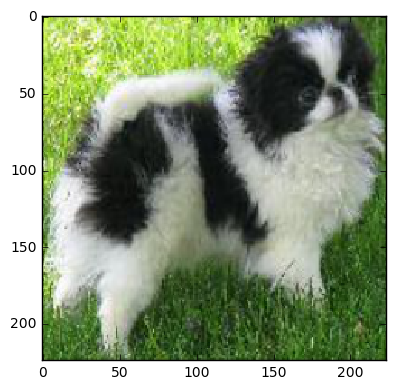

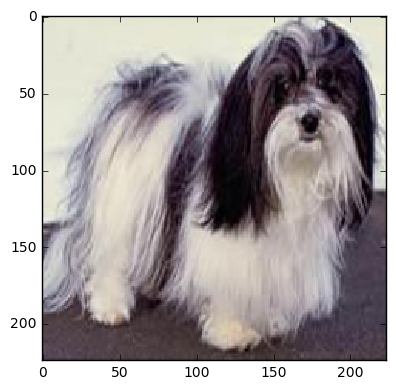

200
200


In [3]:
import scipy.io

file_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['file_list']
file_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['labels']
file_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/file_list.mat')['annotation_list']

test_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['file_list']
test_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['labels']
test_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/test_list.mat')['annotation_list']

train_list = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['file_list']
train_labels = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['labels']
train_annotation = scipy.io.loadmat('/Users/pulkit/Desktop/imagia/data/lists/train_list.mat')['annotation_list']

train_filenames = [x[0][0] for x in train_list]
test_filenames = [x[0][0] for x in test_list]
train_annotation = [x[0][0] for x in train_annotation]

train_labels = [x[0] for x in train_labels]
test_labels = [x[0] for x in test_labels]
test_annotation = [x[0][0] for x in test_annotation]

io.imshow(train_numpy_array[100])
plt.show()
io.imshow(test_numpy_array[100])
plt.show()

###
train_labels = train_labels[:200]
test_labels = test_labels[:200]

###

test_numpy_labels = np.array(test_labels)
train_numpy_labels = np.array(train_labels)

print(len(train_numpy_labels))
print(len(test_numpy_labels))

In [ ]:
from sklearn.preprocessing import scale
train_numpy_array_scaled = scale(train_numpy_array, axis=0, with_mean=True, with_std=True, copy=True )

In [ ]:
from sklearn.preprocessing import scale
test_numpy_array_scaled = scale(test_numpy_array, axis=0, with_mean=True, with_std=True, copy=True )

In [ ]:
print(np.shape(train_numpy_array))
for i in range(len(train_numpy_array)):
    shape = np.shape(train_numpy_array[i])
    shape = shape[2]
    if shape != 3:
        print('hi')

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image


Using TensorFlow backend.


In [12]:


k = np.expand_dims(resize(test_numpy_array[30]*255, (224, 224)), axis=0)
k2 = np.expand_dims(resize(test_numpy_array[30]*255, (299, 299)), axis=0)


inception_bottleneck = inception_v3.InceptionV3(weights='imagenet')
preds_inception = inception_bottleneck.predict(k2, batch_size=32)
_, imagenet_class_name, prob = decode_predictions(preds_inception, top=1)[0][0]
print(imagenet_class_name, prob)


xception_bottleneck = xception.Xception(weights='imagenet')
preds_xception = xception_bottleneck.predict(k2, batch_size=32)
_, imagenet_class_name, prob = decode_predictions(preds_xception, top=1)[0][0]
print(imagenet_class_name, prob)


ResNet50_model = ResNet50(weights='imagenet')
preds_resnet = ResNet50_model.predict(k)
_, imagenet_class_name, prob = decode_predictions(preds_resnet, top=1)[0][0]
print(imagenet_class_name, prob)


vgg_bottleneck = VGG16(weights='imagenet')
preds_vgg = vgg_bottleneck.predict(k, batch_size=32)
_, imagenet_class_name, prob = decode_predictions(preds_vgg, top=1)[0][0]
print(imagenet_class_name, prob)




(u'toy_terrier', 0.7527794)


In [ ]:
print(test_numpy_labels[30])
io.imshow(test_numpy_array[30])
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [126]:
#CNN
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import numpy as np
model = Sequential()

### TODO: Define your architecture.
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16,kernel_size = 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size = 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size = 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size = 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(120,activation='softmax'))
model.summary()

"""
print(np.shape(train_numpy_array))
rand_state = np.random.RandomState(12345)
train_data = rand_state.shuffle(train_numpy_array)
print(np.shape(train_data))
rand_state.seed(12345)
train_labels = rand_state.shuffle(train_numpy_labels)

"""


s = np.arange(train_numpy_array.shape[0])
np.random.shuffle(s)
train_data = train_numpy_array[s]
train_labels = train_numpy_labels[s]
train_labels_logical = np.zeros((200,120))

for i in range(len(train_labels)):
    index = train_labels[i]
    train_labels_logical[i][index] = 1
    
print(train_labels_logical)               

x_train = train_data[:180]
y_train = train_labels_logical[:180]
x_val = train_data[180:]
y_val = train_labels_logical[180:]




model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, nb_epoch=1, validation_data=(x_val, y_val))

classes = np.argmax(model.predict(test_numpy_array[180:185]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_704 (Bat (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_677 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_705 (Bat (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_678 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_706 (Bat (None, 54, 54, 32)        128       
__________

In [138]:
#fine tune

from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input


# create the base pre-trained model
base_model = xception.Xception(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have NUM_CLASSES classes
predictions = Dense(120, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

optimizer = RMSprop(lr=0.001, rho=0.9)

for layer in base_model.layers:
    layer.trainable = False
for layer in model.layers[:116]:
    layer.trainable = False
for layer in model.layers[116:]:
    layer.trainable = True
    
    
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=["accuracy"])


In [139]:
   
model.fit(x_train, y_train, nb_epoch=1, validation_data=(x_val, y_val))


"""
Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_DogResnet50.shape[1:]))
Resnet50_model.add(Dense(133, activation='softmax'))

Resnet50_model.summary()
"""

/Users/pulkit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 180 samples, validate on 20 samples
Epoch 1/1
180/180 [==============================] - 138s 768ms/step - loss: 1.7463 - acc: 0.6889 - val_loss: 0.3990 - val_acc: 0.9500


"\nResnet50_model = Sequential()\nResnet50_model.add(GlobalAveragePooling2D(input_shape=train_DogResnet50.shape[1:]))\nResnet50_model.add(Dense(133, activation='softmax'))\n\nResnet50_model.summary()\n"

In [127]:
model.predict_classes(test_numpy_array[:200])

array([  1,   2, 115,   2,   2,   1,   2,   2,   2,   1,   1,   2,   2,
         1,   1,   1, 119,  78,   2,   2,   2,   1,   2,   1,   2,   1,
         2,   1,   2,  78,   1,   1,   2,   1,   1,   1,  30,   2,   2,
         2,   1,   1,   1,   1, 119,   1,   2,   1,   2,   1,   1, 119,
         2,   2,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   1,   1,   2,   2,   2,  25,   2,   2,
         2,   2,   1,   1,   1,   2, 115,   2,   2, 119,   2,   2,   2,
         2,   2,   2,   2,   2,   1,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   1,   2, 119, 119,   2,
         2,   2, 119,   2,   2,   2,   2,   1,   2,   2, 119,   2,   2,
         2,   2,  12,   2,   2, 119,   2,   2,   2, 119,   2,   2,   2,
         1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2, 115,   2,   2,   2,   2,   2,   2,   2,   1,   

In [140]:
p = []
for i in range(len(test_numpy_array)):
    p.append(np.argmax(model.predict(np.expand_dims(resize(test_numpy_array[i], (299, 299)), axis=0))))
print(k)


1


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


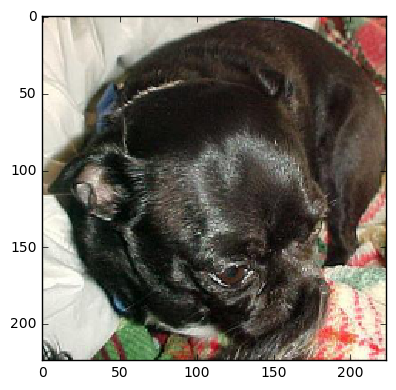

In [123]:
print(test_numpy_labels[:200])
io.imshow(test_numpy_array[7])
plt.show()

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [141]:
print(train_numpy_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
